In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! wget "https://raw.githubusercontent.com/AI4Finance-Foundation/FinRL/refs/heads/master/requirements.txt"
! sudo apt-get install swig
! pip install box2d-py
! pip install -r requirements.txt
! pip install finrl yfinance stable_baselines3

--2025-02-07 21:10:51--  https://raw.githubusercontent.com/AI4Finance-Foundation/FinRL/refs/heads/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     729  --.-KB/s    in 0s      

2025-02-07 21:10:51 (23.0 MB/s) - ‘requirements.txt’ saved [729/729]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 117 not upgraded.
Need to get 1,116 kB of archives.
After

In [4]:
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader

ticker = "NET"
benchmark_ticker = "^GSPC" # S&P 500
start_date = "2015-01-01"
end_date = "2025-01-01"

df_stock = YahooDownloader(start_date=start_date, end_date=end_date, ticker_list=[ticker]).fetch_data()
df_benchmark = YahooDownloader(start_date=start_date, end_date=end_date, ticker_list=[benchmark_ticker]).fetch_data()

df = pd.merge(df_stock, df_benchmark[['date', 'close']], on='date', suffixes=('', '_benchmark'))

df

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (1334, 8)


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (2516, 8)


,date,open,high,low,close,volume,tic,day,close_benchmark
0,2019-09-13,18.000000,18.000000,19.410000,18.000000,35993700,NET,4,3012.209961
1,2019-09-16,18.629999,18.629999,19.549999,18.600000,9758100,NET,0,2996.409912
2,2019-09-17,18.750000,18.750000,18.900000,18.450001,3170900,NET,1,2995.669922
3,2019-09-18,19.590000,19.590000,19.700001,18.830000,4702500,NET,2,3001.500000
4,2019-09-19,18.750000,18.750000,20.480000,20.000000,8514900,NET,3,3010.360107
...,...,...,...,...,...,...,...,...,...
1329,2024-12-24,112.580002,112.580002,113.099998,111.750000,526500,NET,1,5984.629883
1330,2024-12-26,112.610001,112.610001,113.540001,112.110001,787100,NET,3,6024.970215
1331,2024-12-27,110.610001,110.610001,112.360001,111.945000,1496500,NET,4,6006.169922
1332,2024-12-30,109.029999,109.029999,109.400002,108.669998,1449200,NET,0,5920.669922


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

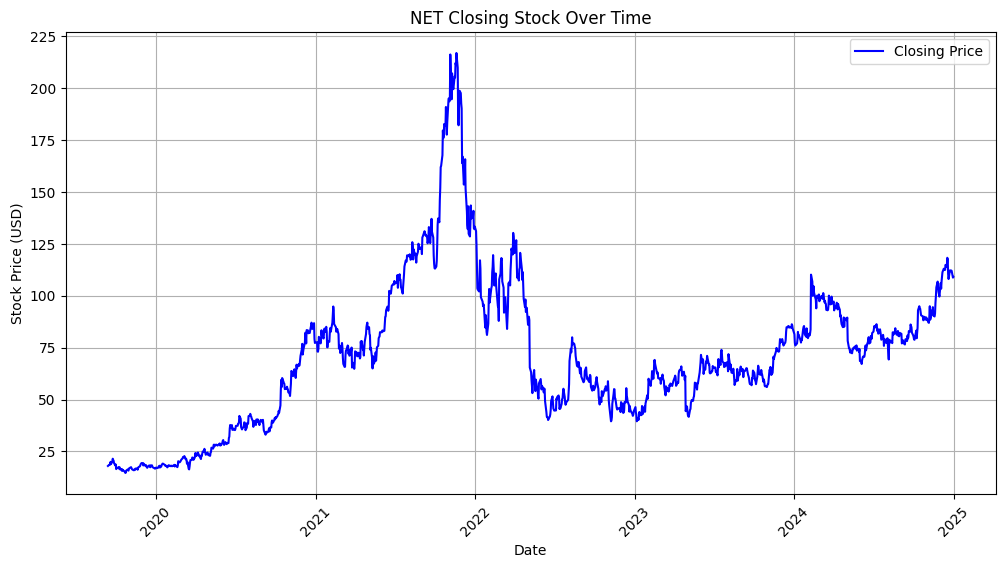

In [5]:
# Plot stock closing price over time
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(df['date']), y=df["close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{ticker} Closing Stock Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

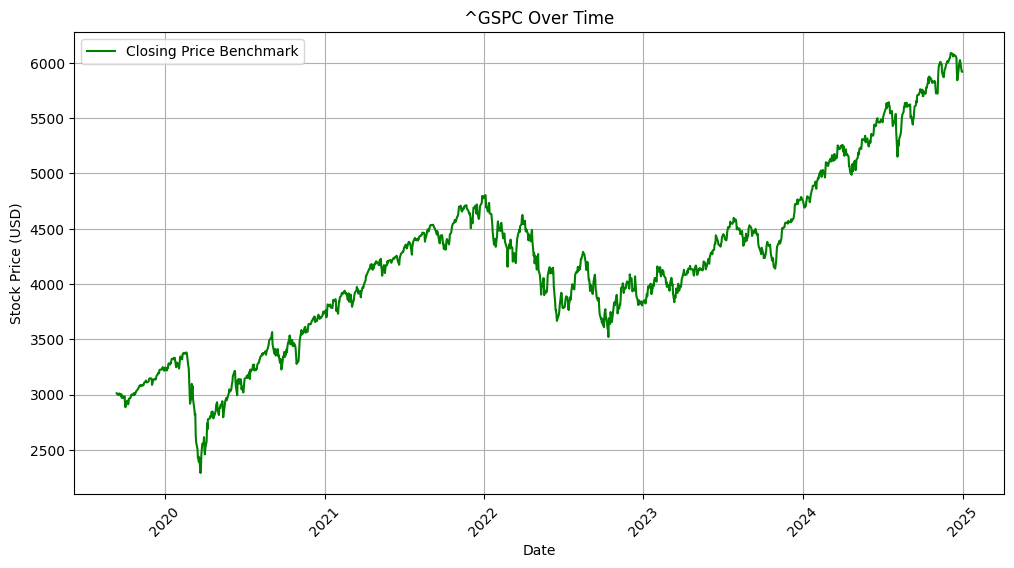

In [6]:
# Plot benchmark data over time
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(df['date']), y=df["close_benchmark"], label="Closing Price Benchmark", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{benchmark_ticker} Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [7]:
from finrl.config import INDICATORS
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

fe = FeatureEngineer(
    use_technical_indicator=True, 
    tech_indicator_list=INDICATORS,
    use_turbulence=True
)
df = fe.preprocess_data(df)

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators
Successfully added turbulence index


,date,open,high,low,close,volume,tic,day,close_benchmark,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2019-09-13,18.000000,18.000000,19.410000,18.000000,35993700,NET,4,3012.209961,0.000000,19.148529,17.451472,100.000000,66.666667,100.000000,18.000000,18.000000,0.000000
1,2019-09-16,18.629999,18.629999,19.549999,18.600000,9758100,NET,0,2996.409912,0.013462,19.148529,17.451472,100.000000,66.666667,100.000000,18.300000,18.300000,0.000000
2,2019-09-17,18.750000,18.750000,18.900000,18.450001,3170900,NET,1,2995.669922,0.012501,18.974501,17.725500,79.452107,0.485541,3.256590,18.350000,18.350000,0.000000
3,2019-09-18,19.590000,19.590000,19.700001,18.830000,4702500,NET,2,3001.500000,0.025478,19.170286,17.769715,86.644175,119.370789,38.908791,18.470000,18.470000,0.000000
4,2019-09-19,18.750000,18.750000,20.480000,20.000000,8514900,NET,3,3010.360107,0.078550,20.272837,17.279164,93.684715,113.229866,38.908791,18.776000,18.776000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,2024-12-24,112.580002,112.580002,113.099998,111.750000,526500,NET,1,5984.629883,4.133907,120.098816,99.888685,59.327329,60.457892,20.370309,105.252834,96.530250,0.022700
1330,2024-12-26,112.610001,112.610001,113.540001,112.110001,787100,NET,3,6024.970215,3.878823,120.135764,100.662738,59.548683,59.286582,20.409856,105.893500,97.064584,0.001839
1331,2024-12-27,110.610001,110.610001,112.360001,111.945000,1496500,NET,4,6006.169922,3.621605,119.788267,102.016735,59.395417,44.880057,18.024724,106.577667,97.615834,0.008028
1332,2024-12-30,109.029999,109.029999,109.400002,108.669998,1449200,NET,0,5920.669922,3.117556,118.572417,104.143585,56.414101,14.009514,12.254571,107.051334,98.114334,0.749927


In [8]:
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

class CustomStockTradingEnv(StockTradingEnv):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.reward_function = None

    def set_reward_function(self, reward_function):
        self.reward_function = reward_function

    def step(self, actions):
        next_state, reward, terminal, truncated, info = super().step(actions)

        if self.reward_function is not None:
            reward = self.reward_function(self, actions, next_state, reward, terminal, truncated, info)
        
        return next_state, reward, terminal, truncated, info

print("Loaded class CustomStockTradingEnv")

Loaded class CustomStockTradingEnv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
reward_logging = False  
overall_reward = 0  

def sample_custom_reward(self, actions, next_state, base_reward, terminal, truncated, info):
    import numpy as np
    import pandas as pd
    
    
    df_total_value = pd.DataFrame(self.asset_memory, columns=["account_value"])
    df_total_value["date"] = self.date_memory
    df_total_value["daily_return"] = df_total_value["account_value"].pct_change(1)
    
    
    df_total_value["benchmark_value"] = self.df["close_benchmark"].iloc[:len(df_total_value)].reset_index(drop=True)
    df_total_value["benchmark_daily_return"] = df_total_value["benchmark_value"].pct_change(1)
    
    
    remove_nan = lambda x: 0 if np.isnan(x) else x
    
    
    mean_returns = df_total_value["daily_return"].mean()
    std_returns = df_total_value["daily_return"].std()
    
    
    bench_returns = df_total_value["benchmark_daily_return"].mean()
    bench_std = df_total_value["benchmark_daily_return"].std()
    
    
    beta = 1.0  
    if bench_std and not np.isnan(bench_std) and bench_std != 0:
        portfolio_returns = df_total_value["daily_return"].fillna(0)
        benchmark_returns = df_total_value["benchmark_daily_return"].fillna(0)
        if len(portfolio_returns) == len(benchmark_returns):
            covariance = np.cov(portfolio_returns, benchmark_returns)[0][1]
            beta = covariance / (bench_std ** 2)
    
    # Compute Sharpe Ratio
    sharpe = 0
    if std_returns and not np.isnan(std_returns):
        sharpe = (252**0.5) * mean_returns / std_returns
    
    # Compute Sortino Ratio
    downside_returns = df_total_value["daily_return"][df_total_value["daily_return"] < 0]
    downside_std = downside_returns.std(ddof=1)
    
    sortino = 0
    if downside_std and not np.isnan(downside_std):
        sortino = (252**0.5) * mean_returns / downside_std
    
    # Compute Treynor Ratio
    treynor = 0
    if beta and not np.isnan(beta) and beta != 0:
        treynor = (252**0.5) * mean_returns / beta
    
    # Compute Differential Return
    diff_return = 0
    if beta and not np.isnan(beta) and beta != 0:
        diff_return = (mean_returns - bench_returns) / beta
    
    if reward_logging:
        print(f"Mean Daily Returns: {mean_returns}")
        print(f"Benchmark Returns: {bench_returns}")
        print(f"Daily Return Standard Deviation: {std_returns}")
        print(f"Downside Only Standard Deviation: {downside_std}")
        print(f"Beta: {beta}")
        print(f"Sharpe Ratio: {sharpe}")
        print(f"Sortino Ratio: {sortino}")
        print(f"Treynor Ratio: {treynor}")
        print(f"Differential Return: {diff_return}")
    
    
    w1, w2, w3, w4 = 0.1, 0.01, 0.01, 1.0
    total_reward = (
        w1 * remove_nan(mean_returns) 
        - w2 * remove_nan(abs(downside_std)) 
        + w3 * remove_nan(treynor) 
        + w4 * remove_nan(diff_return)
    )
    
    if reward_logging:
        print(f"Reward: {total_reward}")
        print("-----------------------------")
    
    global overall_reward
    overall_reward += total_reward
    
    return total_reward

print("Loaded custom reward function")


Loaded custom reward function


In [10]:
indicators = ["volume",	"macd", "boll_ub", "boll_lb", "rsi_30", "cci_30", "dx_30", "close_30_sma", "close_60_sma", "turbulence"]
turbulence_thresold=100

stock_dim = len(df["tic"].unique())
max_price = df['close'].max()
initial_amount = 10000
hmax = int(initial_amount / max_price)

env = CustomStockTradingEnv(
    df=df, 
    stock_dim=stock_dim, 
    hmax=hmax,
    initial_amount=initial_amount, 
    num_stock_shares=[0],
    print_verbosity=2,
    buy_cost_pct=[0.001],
    sell_cost_pct=[0.001],
    turbulence_threshold=turbulence_thresold,
    reward_scaling=1e-4,
    tech_indicator_list=indicators,
    state_space=1 + 2 * stock_dim + len(indicators) * stock_dim,
    action_space=stock_dim,
)

env

In [11]:

env.reset()
reward_logging = True
env.set_reward_function(sample_custom_reward)

env.step(np.array([5]))
env.step(np.array([-5]))
env.step(np.array([0]))
env.step(np.array([0]))
env.step(np.array([0]))
reward_logging = False

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


Mean Daily Returns: 0.013386008773803804
Benchmark Returns: -0.005245334499593635
Daily Return Standard Deviation: nan
Downside Only Standard Deviation: nan
Beta: 1.0
Sharpe Ratio: 0
Sortino Ratio: 0
Treynor Ratio: 0.21249630157928118
Differential Return: 0.018631343273397438
Reward: 0.02209490716657063
-----------------------------
Mean Daily Returns: 0.006481929828406896
Benchmark Returns: -0.0027461467229130676
Daily Return Standard Deviation: 0.009763842080274842
Downside Only Standard Deviation: nan
Beta: -1.8562486077293519
Sharpe Ratio: 10.538622522202948
Sortino Ratio: 0
Treynor Ratio: -0.055433009146488306
Differential Return: -0.004971358099822722
Reward: -0.004877495208446915
-----------------------------
Mean Daily Returns: 0.004321286552271264
Benchmark Returns: -0.0011820416834757985
Daily Return Standard Deviation: 0.007853116845202497
Downside Only Standard Deviation: nan
Beta: -1.4382542772357332
Sharpe Ratio: 8.73516830567113
Sortino Ratio: 0
Treynor Ratio: -0.0476955

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [12]:
from stable_baselines3 import PPO
from stable_baselines3 import A2C

from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
import warnings

warnings.filterwarnings("ignore")

env.reset()
vec_env = make_vec_env(lambda: Monitor(env, '/'), n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1)

model.learn(total_timesteps=80000) 

Using cpu device


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.33e+03 |
|    ep_rew_mean     | 0.274    |
| time/              |          |
|    fps             | 170      |
|    iterations      | 1        |
|    time_elapsed    | 11       |
|    total_timesteps | 2048     |
---------------------------------
day: 1333, episode: 4
begin_total_asset: 10000.00
end_total_asset: 23838.64
total_reward: 13838.64
total_cost: 2355.00
total_trades: 1268
Sharpe: 0.587
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.33e+03    |
|    ep_rew_mean          | 1.71        |
| time/                   |             |
|    fps                  | 159         |
|    iterations           | 2           |
|    time_elapsed         | 25          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004305477 |
|    clip_fraction        | 0.063       |
|   

In [13]:
obs = vec_env.reset()
vec_env.envs[0].unwrapped.episode = 0 
overall_reward = 0 

portfolio_values = []
timesteps = []

i = 0
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, done, info = vec_env.step(action)

    if done[0]:
        break

    portfolio_value = vec_env.envs[0].unwrapped.asset_memory[-1]
    portfolio_values.append(portfolio_value)
    timesteps.append(i)
    i += 1

day: 1333, episode: 0
begin_total_asset: 10000.00
end_total_asset: 55699.02
total_reward: 45699.02
total_cost: 9.99
total_trades: 1333
Sharpe: 0.813


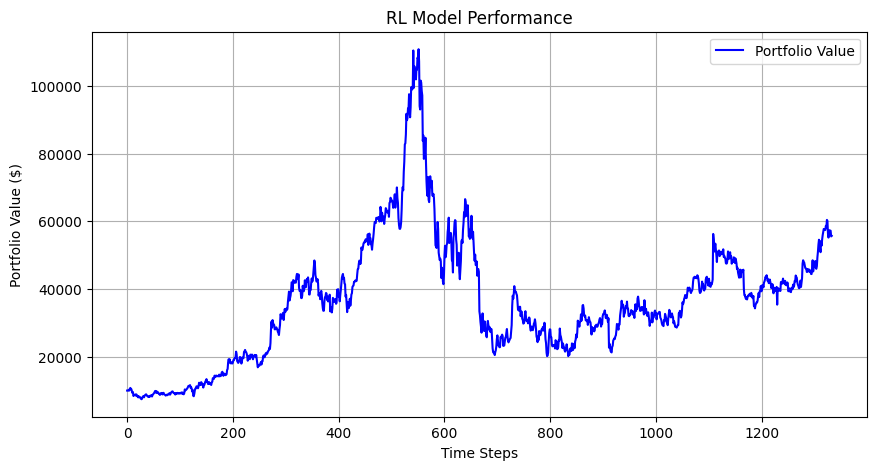

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(timesteps, portfolio_values, label="Portfolio Value", color='blue')
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value ($)")
plt.title("RL Model Performance")
plt.legend()
plt.grid()
plt.show()

In [15]:
model.save("Cloudflare")